In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 50)

In [2]:
df = pd.read_csv('property_listing.csv')
df = (df
.rename(
    columns = {
        'Car Parks' : 'Car_parks',
        'Property Type' : 'Property_type'

        }
    )
)

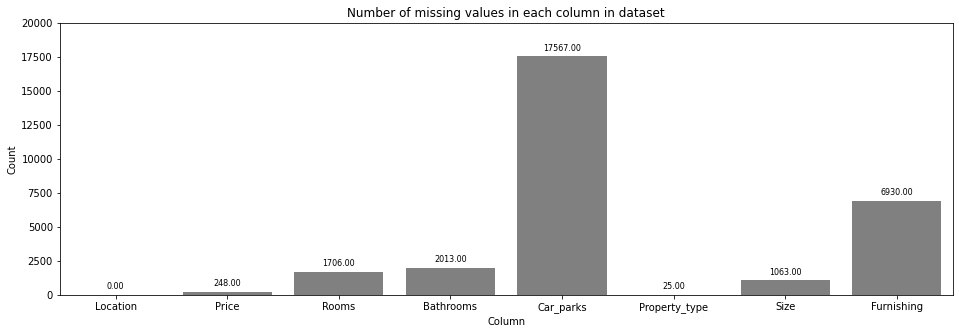

In [3]:
fig,ax = plt.subplots(1,1,figsize=(16, 5))

g = sns.barplot(
    data = df.isnull().sum().to_frame().reset_index(),
    x = 'index',
    y = 0,
    ax=ax,
    color = 'gray'
)

for val in g.patches:
    g.annotate(
        format(val.get_height(), '.2f'),
        (val.get_x() + val.get_width() / 2,
        val.get_height()), 
        ha='center', 
        va='center',
        size=8, 
        xytext=(0, 8),
        textcoords='offset points'
    )

g.set_ylim(0, 20000)
g.set_xlabel('Column')
g.set_ylabel('Count')
g.set_title('Number of missing values in each column in dataset')
plt.show()

#### Drop instances of rows with too many null values | Final data size: 50,623 rows

In [4]:
df['Missing_counts'] = df.isna().sum(axis=1)

def modify(df):
    return (df
    .assign(
        # Car_parks = df.Car_parks.fillna(0),
        Furnishing = df.Furnishing.fillna('Unknown')
    )
    .drop(
        df.query("Missing_counts > 4 or Price.isna() or Rooms.isna() or Bathrooms.isna() or Size.isna() or Property_type.isna()").index,
        )
    .drop(
        columns=['Missing_counts']
    )
    ).reset_index(drop=True)

In [5]:
modify(df)

,Location,Price,Rooms,Bathrooms,Car_parks,Property_type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
4,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
...,...,...,...,...,...,...,...,...
50618,"Bangsar, Kuala Lumpur","RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
50619,"Bangsar, Kuala Lumpur","RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
50620,"Bangsar, Kuala Lumpur","RM 5,500,000",5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
50621,"Wangsa Maju, Kuala Lumpur","RM 480,000",3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


### Reformatting data

In [6]:
df_dropna = modify(df)

def get_construction_size(x):
    to_replace = {
        ',' : '',
        'sq. ft.': '',
        'x' : '*',
        'X' : '*'
    }
    
    for a, b in to_replace.items():
        x = x.replace(a, b)

    return x

modified_df = (df_dropna
.assign(
    Price = df_dropna.Price.apply(lambda x: int((x.replace('RM', '').replace(',', '')))),
    Construction_type = df_dropna.Size.apply(lambda x: x.split(' :')[0]),
    Construction_size = df_dropna.Size.apply(lambda x: x.split(' :')[1]),
    Location = df_dropna.Location.apply(lambda x: x.split(',')[0])
)
.astype({
    'Furnishing' : 'category',
    'Construction_type' : 'category'
})
).drop(columns=['Size'])

modified_df

,Location,Price,Rooms,Bathrooms,Car_parks,Property_type,Furnishing,Construction_type,Construction_size
0,KLCC,1250000,2+1,3.0,2.0,Serviced Residence,Fully Furnished,Built-up,"1,335 sq. ft."
1,Damansara Heights,6800000,6,7.0,NaN,Bungalow,Partly Furnished,Land area,6900 sq. ft.
2,Dutamas,1030000,3,4.0,2.0,Condominium (Corner),Partly Furnished,Built-up,"1,875 sq. ft."
3,Bukit Jalil,900000,4+1,3.0,2.0,Condominium (Corner),Partly Furnished,Built-up,"1,513 sq. ft."
4,Taman Tun Dr Ismail,5350000,4+2,5.0,4.0,Bungalow,Partly Furnished,Land area,7200 sq. ft.
...,...,...,...,...,...,...,...,...,...
50618,Bangsar,5100000,5+1,4.0,NaN,Bungalow (Corner),Fully Furnished,Land area,7168 sq. ft.
50619,Bangsar,5000000,5,4.0,NaN,Bungalow (Intermediate),Unfurnished,Land area,15000 sq. ft.
50620,Bangsar,5500000,5+1,4.0,NaN,Bungalow (Intermediate),Partly Furnished,Land area,7168 sq. ft.
50621,Wangsa Maju,480000,3,2.0,NaN,Condominium (Intermediate),Unfurnished,Built-up,"1,150 sq. ft."


#### Addressing Construction Size inconsistencies

In [7]:
def filter(x):
    if 'sq. ft.' in x:
        for each in x:
            if bool(re.search('[^0-9|sq. ft.|x|X|,]', each)): 
                return np.NaN
        return x
    else:
        return np.NaN

def calc_size(x):
    x = x.replace(',', '').replace('sf', '').replace('sq. ft.', '').replace('xx', '*').replace('X', '*').replace('x', '*')
    try:
        return eval(x)
    except SyntaxError:
        return np.NaN
    except ValueError:
        return np.NaN

filtered_df = modified_df[modified_df.Construction_size.apply(lambda x: filter(x)).notna()].copy()
filtered_df.Construction_size = filtered_df.Construction_size.apply(lambda x: calc_size(x))
filtered_df.dropna(subset=['Construction_size'], inplace=True)

### Classifying Property types / Finalizing Structure

In [175]:
# filtered_df['Property_classification'] = filtered_df.Property_type.apply(lambda x: ''.join(re.findall("\([a-zA-Z]+\)", x)))

df = (filtered_df
.assign(
    Property_classification = filtered_df.Property_type.apply(lambda x: ''.join(re.findall("\([a-zA-Z]+\)", x)).replace('(', '').replace(')','')),
    Property_type = filtered_df.Property_type.apply(lambda x: x.split('(')[0].replace(' ', ''))
)
.astype({
    'Property_type': 'category',
    'Property_classification': 'category'
})
).replace('', 'None').reset_index(drop=True)[['Location', 'Price', 'Rooms', 'Bathrooms', 'Car_parks', 'Property_type', 'Property_classification', 'Furnishing', 
'Construction_type', 'Construction_size']].copy()

In [176]:
df

,Location,Price,Rooms,Bathrooms,Car_parks,Property_type,Property_classification,Furnishing,Construction_type,Construction_size
0,KLCC,1250000,2+1,3.0,2.0,ServicedResidence,None,Fully Furnished,Built-up,1335.0
1,Damansara Heights,6800000,6,7.0,NaN,Bungalow,None,Partly Furnished,Land area,6900.0
2,Dutamas,1030000,3,4.0,2.0,Condominium,Corner,Partly Furnished,Built-up,1875.0
3,Bukit Jalil,900000,4+1,3.0,2.0,Condominium,Corner,Partly Furnished,Built-up,1513.0
4,Taman Tun Dr Ismail,5350000,4+2,5.0,4.0,Bungalow,None,Partly Furnished,Land area,7200.0
...,...,...,...,...,...,...,...,...,...,...
50297,Bangsar,5100000,5+1,4.0,NaN,Bungalow,Corner,Fully Furnished,Land area,7168.0
50298,Bangsar,5000000,5,4.0,NaN,Bungalow,Intermediate,Unfurnished,Land area,15000.0
50299,Bangsar,5500000,5+1,4.0,NaN,Bungalow,Intermediate,Partly Furnished,Land area,7168.0
50300,Wangsa Maju,480000,3,2.0,NaN,Condominium,Intermediate,Unfurnished,Built-up,1150.0


### Overview of distribution of Property type / Property classification

In [255]:
# df_groups = df[['Property_type', 'Property_classification', 'Price']].groupby(['Property_type', 'Property_classification']).count().rename(columns={'Price': 'Count'})
# df_groups.reset_index().pivot(index='Property_type', columns='Property_classification')['Count']

df_distribution = df.groupby(['Property_type', 'Property_classification']).Property_type.agg('count').to_frame('count').reset_index().pivot(
    index='Property_type', columns='Property_classification'
    )

df_distribution[('count', 'sum')] = df_distribution.sum(axis=1)
df_distribution

count                                              \
Property_classification    None Corner Duplex EndLot Intermediate Penthouse   
Property_type                                                                 
1-styTerrace/LinkHouse      177     90      0     41          476         0   
1.5-styTerrace/LinkHouse     28     15      0      3           50         0   
2-styTerrace/LinkHouse      966    448      3    210         2331         1   
2.5-styTerrace/LinkHouse    173     44      1     45          422         1   
3-styTerrace/LinkHouse      398    179      1    114          908         0   
3.5-styTerrace/LinkHouse     70     22      0      4           89         0   
4-styTerrace/LinkHouse       18     12      0      0           26         1   
4.5-styTerrace/LinkHouse      5      1      0      0           12         0   
Apartment                   631    261      5     35          658         6   
Bungalow                   1554    669      2     53          918         1   
BungalowLand                 14      6      0      0            7         0   
ClusterHouse                  2      1      0      0            5         0   
Condominium               10911   5568    205    369         4993       258   
Flat                        138     46      0     11          149         1   
ResidentialLand              20      8      0      1           12         0   
Semi-detachedHouse          778    308      2     69          871         0   
ServicedResidence          6763   2307    137    184         3162        91   
Townhouse                   162     43     12     29          282         0   

                                                     
Property_classification  SOHO Studio Triplex    sum  
Property_type                                        
1-styTerrace/LinkHouse      0      0       0    784  
1.5-styTerrace/LinkHouse    0      0       0     96  
2-styTerrace/LinkHouse      0      0       0   3959  
2.5-styTerrace/LinkHouse    0      0       1    687  
3-styTerrace/LinkHouse      0      0       1   1601  
3.5-styTerrace/LinkHouse    0      0       0    185  
4-styTerrace/LinkHouse      0      0       0     57  
4.5-styTerrace/LinkHouse    0      0       0     18  
Apartment                   0      3       1   1600  
Bungalow                    0      0       0   3197  
BungalowLand                0      0       0     27  
ClusterHouse                0      0       0      8  
Condominium                 4     16      16  22340  
Flat                        0      0       0    345  
ResidentialLand             0      0       0     41  
Semi-detachedHouse          0      0       4   2032  
ServicedResidence          66     77      10  12797  
Townhouse                   0      0       0    528

#### SK ENCODING

In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [46]:
pd.DataFrame({
    # 'column' : df.columns,
    'column_nunique' :  [df[each].nunique() for each in df.columns],
    'data_type': df.dtypes
    })

,column_nunique,data_type
Location,104,object
Price,3890,int64
Rooms,43,object
Bathrooms,17,float64
Car_parks,21,float64
Property_type,36,category
Property_classification,9,category
Furnishing,4,category
Construction_type,2,category
Construction_size,3764,float64


In [258]:
categorical_cols, numerical_cols = ['Location', 'Rooms', 'Property_type', 'Property_classification', 'Furnishing', 'Construction_type'], \
['Price', 'Bathrooms', 'Car_parks', 'Construction_size']

preprocessor = ColumnTransformer([
    ('categorical_encoding', OneHotEncoder(sparse=True, handle_unknown='ignore'), categorical_cols),
    ('numerical_encoding', StandardScaler(), numerical_cols),
    ('imputing', SimpleImputer(strategy='median'), ['Car_parks'])
], remainder='passthrough')

pipeline = make_pipeline(preprocessor, LogisticRegression())


# testing
pd.DataFrame(preprocessor.fit_transform(df.head(1000)), columns = preprocessor.get_feature_names_out())

,categorical_encoding__Property_type_1-styTerrace/LinkHouse,categorical_encoding__Property_type_1.5-styTerrace/LinkHouse,categorical_encoding__Property_type_2-styTerrace/LinkHouse,categorical_encoding__Property_type_2.5-styTerrace/LinkHouse,categorical_encoding__Property_type_3-styTerrace/LinkHouse,categorical_encoding__Property_type_3.5-styTerrace/LinkHouse,categorical_encoding__Property_type_4-styTerrace/LinkHouse,categorical_encoding__Property_type_4.5-styTerrace/LinkHouse,categorical_encoding__Property_type_Apartment,categorical_encoding__Property_type_Bungalow,...,categorical_encoding__Property_type_Townhouse,numerical_encoding__Price,imputing__Car_parks,remainder__Location,remainder__Rooms,remainder__Bathrooms,remainder__Property_classification,remainder__Furnishing,remainder__Construction_type,remainder__Construction_size
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.483682,2.0,KLCC,2+1,3.0,None,Fully Furnished,Built-up,1335.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.719248,2.0,Damansara Heights,6,7.0,None,Partly Furnished,Land area,6900.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.571006,2.0,Dutamas,3,4.0,Corner,Partly Furnished,Built-up,1875.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.622606,2.0,Bukit Jalil,4+1,3.0,Corner,Partly Furnished,Built-up,1513.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.143707,4.0,Taman Tun Dr Ismail,4+2,5.0,None,Partly Furnished,Land area,7200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.245528,2.0,Mont Kiara,4+1,4.0,None,Partly Furnished,Built-up,1830.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.13155,2.0,Ampang,5,5.0,None,Partly Furnished,Land area,14000.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.384451,2.0,KLCC,3+1,4.0,None,Fully Furnished,Built-up,2098.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.687244,3.0,Taman Tun Dr Ismail,4+1,5.0,None,Partly Furnished,Built-up,3832.0
